# Hopfield Network

## Import dependencies

In [70]:
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

from random import randint

# Data

## Load data

In [2]:
TRAIN_DIR = Path('/home/philipp/Projects/Hopfield-Neural-Network/mnist_png/train/')
TEST_DIR = Path('/home/philipp/Projects/Hopfield-Neural-Network/mnist_png/test/')

Train files:

In [3]:
train_files = sorted(list(TRAIN_DIR.rglob('*.png')))
train_labels = [int(path.name[:1]) for path in train_files]
train_images = []
for file in train_files:
    train_images.append(Image.open(file))

Test files:

In [6]:
test_files = []
test_labels = []
test_images = []
for folder in sorted(TEST_DIR.iterdir()):
    for file in sorted(list(folder.rglob('*.png')))[:1]:
        test_images.append(Image.open(file))
        test_labels.append(int(file.parent.name))

## Pre-Process Data

In [7]:
def prepare_data(images, labels):
    data = {}
    for im, lab in zip(images, labels):
        image = np.array(im).flatten()
        image = [1 if pixel > 0 else -1 for pixel in image]
        data[lab] = np.array(image)
        data[lab].resize((1,28*28))
    return data

In [8]:
train_data = prepare_data(train_images, train_labels)

In [9]:
test_data = prepare_data(test_images, test_labels)

##### Data Parameters

In [10]:
n_train = len(train_data)

In [11]:
# Size of image(width)
n_side = 28

# Number of neurons
n_neurons = n_side * n_side

# Neural Network

## Train

In [51]:
def train_binary(neu, train_data):
    w = np.zeros([neu, neu])
    for x in range(len(train_data)):
        for i in range(neu):
            for j in range(neu):
                w[i][j] += (2*train_data[x][0][i]-1)*(train_data[x][0][j]-1)
                if i == j:
                    w[i, j] = 0
    return w

In [50]:
def train_bipolar(neu, train_data):
    w = np.zeros([neu, neu])
    for x in range(len(train_data)):
        for i in range(neu):
            for j in range(neu):
                w[i][j] += train_data[x][0][i]*train_data[x][0][j]
                if i == j:
                    w[i, j] = 0
    return w

In [52]:
theta_binary = np.zeros((1,n_neurons))

In [66]:
def theta_bipolar(W, neu):
    t = np.zeros((1,neu))
    theta = 0.
    for row in W:
        theta += row.sum()
    theta /= 2
    t += theta
    return t

## Test

In [18]:
def test(weights, train_data, test_data, theta=0):
    accuracy = 0.0
    for label in test_data:
        image = test_data[label]
        predict_data = get_output_neuron(weights, image)
        if np.array_equal(train_data[label], predict_data):
            accuracy += 1.0
    accuracy /= len(test_data)
    return accuracy

## Main

In [54]:
W_binary = train_binary(n_neurons, train_data)

In [56]:
W_bipolar = train_bipolar(n_neurons, train_data)

In [58]:
W_bipolar

array([[ 0., 10., 10., ..., 10., 10., 10.],
       [10.,  0., 10., ..., 10., 10., 10.],
       [10., 10.,  0., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ...,  0., 10., 10.],
       [10., 10., 10., ..., 10.,  0., 10.],
       [10., 10., 10., ..., 10., 10.,  0.]])

In [67]:
theta_bipolar = theta_bipolar(W, n_neurons)

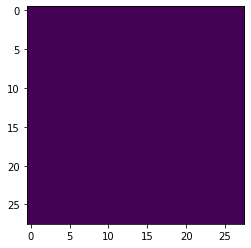

In [74]:
b = test_data[2][0] @ W_binary - theta_binary

c = (b > 0)
c = np.array(c, dtype=int)
plt.imshow(c.reshape((28,28)))

#### Test

In [58]:
accuracy = test(W, train_data, test_data)

Print accuracy

In [59]:
print("Accuracy of the network is %f" % (accuracy * 100))

Accuracy of the network is 0.000000


In [80]:
pred = get_output_neuron(W, train_data[0])
show_image(pred)